# Project : Using AirBnB data to understand the homeowners' market in Seattle

## Introduction

The Airbnb datasets contain real data that of rent listing in Seattle posted on Airbnb. 
The data contain rich information that covers all on characteristics of that listing from homeowner to the property itself. 
There are three datasets available: 
* listings.csv: contains all characteristics of a rental listing and the host. 
* calendar.csv: contains all availability of all rentals from 01/2016 to 01/2017. 
* reviews.csv: contains all the review available for listing. 


In this project, I will use available Seatle Airbnb data to answer the following questions:

#### 1.How well can a machine learning model predict the rental price listing? 
#### 2.  What are the key features that determine the price? 
#### 3. How the price and availability of the rental vary across months? 


I will use data analysis to answer each question. For each question, I will use the CRISP-DM (Cross Industry Process for Data Mining) process as a guide for directing the entire pipeline from data understanding to final evaluation. The steps in the CRISP-DM process include:

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deploy
-------------------------------------------------------------------------------------------------------------------------------

## Part 1: Question: How well can a machine learning model predict the rental price listing? 

In part 1, I will do import the data from raw CSV files, performing cleaning, with missing value and outlier and modeling to predict the price from Seatle airbnb data.

### Section 1: Understanding business question
Predict the price listing is an important business question. As hosts, if we try to charge above market price, then renters will select more affordable alternatives. If we set our nightly rent price too low, we'll miss out on potential revenue. As Airbnb, the appropriate price setting will allow us to provide the best price to the guest and ensure the host to have good revenue. I will build the machine learning model to automate the predicting process.

### Section 2: Understanding the data
In this section, I will look at the data in general, to see what columns data has, how missing values distributed in the data, and what information each column provide 

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
# See all columns in a dataframe
pd.set_option('display.max_columns', None)

In [2]:
# import data 
listing_data = pd.read_csv("./airbnbdata/listings.csv")

In [3]:
# get the list of all the columns in data 
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
# data sample 
print(" the shape of listing data is {}".format(listing_data.shape))

 the shape of listing data is (3818, 92)


##### Create a table including basic infomration related to each column to better understand the data. 

In [5]:
# get the sample, data type of each column

columns_list = listing_data.columns.tolist()
sample_data = pd.DataFrame()
sample_data['col'] = pd.Series(columns_list)
sample_data['example'] = pd.Series([listing_data[col][0] for col in columns_list])
sample_data['type'] = pd.Series([type(listing_data[col][0]) for col in columns_list])
sample_data['num_missing'] = pd.Series([listing_data[col].isnull().sum() for col in columns_list])
sample_data['num_unique'] = pd.Series([listing_data[col].nunique() for col in columns_list])

# Look at the sample, detail at each column 
sample_data  

,col,example,type,num_missing,num_unique
0,id,241032,<class 'numpy.int64'>,0,3818
1,listing_url,https://www.airbnb.com/rooms/241032,<class 'str'>,0,3818
2,scrape_id,20160104002432,<class 'numpy.int64'>,0,1
3,last_scraped,2016-01-04,<class 'str'>,0,1
4,name,Stylish Queen Anne Apartment,<class 'str'>,0,3792
5,summary,NaN,<class 'float'>,177,3478
6,space,Make your self at home in this charming one-be...,<class 'str'>,569,3119
7,description,Make your self at home in this charming one-be...,<class 'str'>,0,3742
8,experiences_offered,none,<class 'str'>,0,1
9,neighborhood_overview,NaN,<class 'float'>,1032,2506


### Section 3 : Data Preparation 

In this section, I will do the following steps to preprocess the data for further analysis:

#### 1. Remove the columns with only one unique value since they do not provide any variation for data analysis. 
There are several columns in the dataset with only one unique value. 

#### 2. Remove columns for the redundant column for analysis purpose 
* There are some columns which are used for identification only. They do not have any meaning from the analytics purpose. 
* There are a lot of columns providing geographic information, that many of them provide unneeded information for the predictive model. I will decide to use one column "neighborhood_cleansed_group." That column allows us to have a good amount of information without producing too many dummies variable that can increase the dimension of the features significantly. 

#### 3.  Reformat columns that represent the incorrect type 
There is some row that encoded as a string with a special character such as but most likely to represent a numeric value such as 'price', 'security_deposit,' 'cleaning_fee,' 'extra_people' -> we need to encode those variable as a float type. 

#### 4. Dealing with the missing value 
* Drop the columns with a significant portion of missing value.
* Do imputation for the column with few missing values. 

#### 5. Encoding categorical columns: 
I will perform one hot encoding for multi-categorical variables

#### 6. Featuring 'amenities' column:
As we see in the sample table above, the 'amenities' columns contain the string that listing all the amenities available for the property, separated by a (;). I will to the data featuring by creating new columns with a binary value,  and each column corresponds to a specific amenity. 


#### Section 3.1: Remove the columns with only one unique value since they do not provide any variation for data 

In [6]:
#  Find the columns that has only one value : 

cols_unique = [col for col in listing_data.columns.tolist() if listing_data[col].nunique()==1]
cols_unique

['scrape_id',
 'last_scraped',
 'experiences_offered',
 'market',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'jurisdiction_names']

In [7]:
# Drop the columns with one value: 
listing_data = listing_data.drop(cols_unique, axis =1 )

In [8]:
listing_data.shape

(3818, 82)

#### Section 3.2: Remove the columns for with redundant information. 

In this section, I will delete the columns for identification purpose, and some columns with text description, summary, name, notes, URL  that they are not useful for data analysis of price. 

In [9]:
# Drop the columns that are for identification purpose only 

col_identification = ['listing_url','thumbnail_url','medium_url','picture_url', 'xl_picture_url',
                      'host_url','host_thumbnail_url','host_picture_url', 'host_name', 'host_id', 'host_location', 'host_verifications']

# Drop other redundant columns 
col_other =  ['host_listings_count', 'host_total_listings_count', 'host_has_profile_pic' , 
               'host_since', 'summary', 'space', 'description', 'name', 'host_about', 'notes']

listing_data = listing_data.drop(col_identification, axis =1 )
listing_data = listing_data.drop(col_other, axis =1 )


I notice that many columns are providing the geographic information of the rentals. 
I decided to use 'neighbourhood_group_cleansed'  column for geographic information since it provides the right amount of geographic information without producing too many dimensions. Other column related to geographic will be dropped. 


In [10]:
# Drop columns with redundant geographic information 
# since I decide to use the zipcode and neighboorhood as the geographic info for the analysis

col_redundant = ['neighbourhood','host_neighbourhood','neighbourhood_cleansed', 'state', 'city','street',
                  'smart_location', 'zipcode',  'latitude','longitude','first_review','last_review','calendar_updated' 
                ]

listing_data = listing_data.drop(col_redundant, axis =1 )

In [11]:
listing_data['cleaning_fee'].head()


0        NaN
1     $40.00
2    $300.00
3        NaN
4    $125.00
Name: cleaning_fee, dtype: object

#### Section 3.3 :  Reformat columns that represent the incorrect type 
There are columns that encoded as string but should be recognized as numerical. 
* 'host_response_rate'
* 'host_acceptance_rate'
* 'price'
* 'security_deposit'
* 'cleaning_fee'
* 'extra_people'

Those columns has percentage or dollar sign that need to be removed before convert to the float type. 


In [12]:
# transform columns with dollar or percentage special charater to numeric 
def numerical_trans(x):
    if str(x) != '': 
        for char in ["$", "%", ","]:
            x = str(x).replace(char, "")
        x = float(x)
    return x 

for col in ['price', 'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate', 'host_acceptance_rate']:
    listing_data[col] = listing_data[col].apply(lambda x : numerical_trans(x))


In [13]:
## check those column after transforming 
listing_data[['price', 'security_deposit', 'cleaning_fee', 'extra_people', 'host_response_rate', 'host_acceptance_rate']].head()

,price,security_deposit,cleaning_fee,extra_people,host_response_rate,host_acceptance_rate
0,85.0,NaN,NaN,5.0,96.0,100.0
1,150.0,100.0,40.0,0.0,98.0,100.0
2,975.0,1000.0,300.0,25.0,67.0,100.0
3,100.0,NaN,NaN,0.0,NaN,NaN
4,450.0,700.0,125.0,15.0,100.0,NaN


In [14]:
# divide by 100 to reflect two value of the rate 
listing_data['host_response_rate'] = listing_data['host_response_rate']/100 
listing_data['host_acceptance_rate'] = listing_data['host_acceptance_rate']/100

 Fill the NaN value in column 'security_deposit' and 'cleaning_fee' as 0  since the missing value most likely present the zeros 

In [15]:
# fill the NaN value in column 'security_deposit' and 'cleaning_fee' as 0 
listing_data[['security_deposit', 'cleaning_fee']] = listing_data[['security_deposit', 'cleaning_fee']].fillna(0)

####  Section 3.4: Dealing with missing value 

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. I will use matplotlib's hist() function to visualize the distribution of missing value counts to find these columns. Then I will remove those columns from data.

Second, I will do the imputation for the missing value for columns with few missing values. 

In [16]:
# get the percentage of missing value in each column 

missing_percent = listing_data.isnull().sum(axis =0) /listing_data.shape[0] *100

missing_percent

id                                    0.000000
neighborhood_overview                27.029859
transit                              24.463070
host_response_time                   13.698271
host_response_rate                   13.698271
host_acceptance_rate                 20.246202
host_is_superhost                     0.052383
host_identity_verified                0.052383
neighbourhood_group_cleansed          0.000000
is_location_exact                     0.000000
property_type                         0.026192
room_type                             0.000000
accommodates                          0.000000
bathrooms                             0.419068
bedrooms                              0.157150
beds                                  0.026192
bed_type                              0.000000
amenities                             0.000000
square_feet                          97.459403
price                                 0.000000
weekly_price                         47.380828
monthly_price

(array([ 30.,  10.,   3.,   0.,   1.,   0.,   1.,   0.,   0.,   2.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

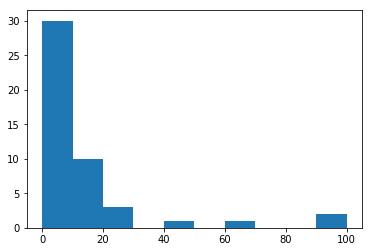

In [17]:
plt.hist(missing_percent)

From the histogram of number of missing value across columns, I decide to drop all the columns with more than 20% of samples are missing 

In [18]:
# get the list of all columns with more than 20% samples has missing value 
col_drop = missing_percent[missing_percent > 20].index
col_drop

Index(['neighborhood_overview', 'transit', 'host_acceptance_rate',
       'square_feet', 'weekly_price', 'monthly_price', 'license'],
      dtype='object')

In [19]:
# drop those columns 
listing_data = listing_data.drop(col_drop, axis =1 )

In [20]:
# look at the data with few missing value 
few_missing_col = missing_percent[(missing_percent>0) & (missing_percent <0.2)].index.tolist()
few_missing_col 

#listing_data[few_missing_col]

['host_is_superhost',
 'host_identity_verified',
 'property_type',
 'bedrooms',
 'beds']

In [21]:
listing_data.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,within a few hours,0.96,f,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,within an hour,0.98,t,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,within a few hours,0.67,f,t,Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,NaN,NaN,f,t,Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,0.0,0.0,1,0.0,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,278830,within an hour,1.00,f,t,Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [22]:
listing_data['beds'].head()
listing_data['bedrooms'].head()
listing_data['bathrooms'].head()
listing_data['host_response_time'].value_counts()
#listing_data['host_response_time'].head()


within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [23]:
listing_data.columns

Index(['id', 'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_group_cleansed',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

##### Do Imputation for  missing value 

* For those numeric columns, I will do imputation the missing value with the mean. 

* For those categorical columns I will do imputation the missing value with the mode.  

In [24]:
# impute the missing value for numeric columns 

from sklearn.preprocessing import Imputer 

imputer1 = Imputer(strategy = 'mean', axis = 0 )

numeric_col = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
             'review_scores_checkin','review_scores_communication','review_scores_location', 'review_scores_value',
               'reviews_per_month', 'beds',  'bedrooms', 'bathrooms', 'host_response_rate' ]
 
data = imputer1.fit_transform(listing_data[numeric_col])

listing_data[numeric_col] = pd.DataFrame(data, columns = numeric_col)

listing_data[numeric_col].head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,beds,bedrooms,bathrooms,host_response_rate
0,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,4.070000,1.0,1.0,1.0,0.960000
1,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.480000,1.0,1.0,1.0,0.980000
2,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.150000,7.0,5.0,4.5,0.670000
3,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919,2.0,0.0,1.0,0.948868
4,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.890000,3.0,3.0,2.0,1.000000


In [25]:
# look at the categorical data 
categorical_col = ['host_is_superhost', 'property_type', 'host_response_time', 'host_identity_verified']

listing_data[categorical_col].head()


,host_is_superhost,property_type,host_response_time,host_identity_verified
0,f,Apartment,within a few hours,t
1,t,Apartment,within an hour,t
2,f,House,within a few hours,t
3,f,Apartment,NaN,t
4,f,House,within an hour,t


In [26]:
listing_data['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

Before doing the imputation for the categorical variable, I need to do the following:

* Regroup the property_type column. The property_type column has 16 different value, but many values have very few samples. So I map multiple values to the one group so that we don't have too many columns when we do One-Hot-Encode and we still have a good amount of information. 
* Encode the column 'host_is_superhost', 'host_response_time' since sklearn.preprocessing.Imputer only works with numeric data.  


In [27]:
# Regroup the property_type column
def label_type(x):
    if x == 'House':
        return 1 
    elif x== 'Apartment':
        return 2
    elif x== 'Townhouse':
        return 3 
    elif x == 'Condominium':
        return 4 
    elif x == np.NaN:
        return np.NaN
    else: 
        return 5 

listing_data['property_type'] = listing_data['property_type'].apply(lambda x: label_type(x))

In [28]:
# Label encode 'host_is_superhost', 'host_identity_verified'

listing_data['host_identity_verified'] = listing_data['host_identity_verified'].map({'t':1, 'f':0})
listing_data['host_is_superhost'] = listing_data['host_is_superhost'].map({'t':1, 'f':0})

In [29]:
# encode 'host_response_time'

listing_data['host_response_time'] = listing_data['host_response_time'].map({'within an hour':1, 'within a few hours': 2, 
                                                                           'within a day': 3, 'a few days or more': 4 })

In [30]:
(listing_data[categorical_col])

,host_is_superhost,property_type,host_response_time,host_identity_verified
0,0.0,2,2.0,1.0
1,1.0,2,1.0,1.0
2,0.0,1,2.0,1.0
3,0.0,2,NaN,1.0
4,0.0,1,1.0,1.0
5,0.0,1,NaN,1.0
6,1.0,1,1.0,1.0
7,1.0,5,1.0,1.0
8,0.0,2,NaN,1.0
9,1.0,2,1.0,1.0


In [31]:
# initiate the imputer 

imputer2 = Imputer(strategy = 'most_frequent', axis =0 )

data = imputer2.fit_transform(listing_data[categorical_col])

# transform the array back to DataFrame 

listing_data[categorical_col] = pd.DataFrame(data, columns = categorical_col)

In [32]:
listing_data.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2.0,0.960000,0.0,1.0,Queen Anne,t,2.0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,f,moderate,f,f,2,4.070000
1,953595,1.0,0.980000,1.0,1.0,Queen Anne,t,2.0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,f,strict,t,t,6,1.480000
2,3308979,2.0,0.670000,0.0,1.0,Queen Anne,t,1.0,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,f,strict,f,f,2,1.150000
3,7421966,1.0,0.948868,0.0,1.0,Queen Anne,t,2.0,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,0.0,0.0,1,0.0,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,f,flexible,f,f,1,2.078919
4,278830,1.0,1.000000,0.0,1.0,Queen Anne,t,1.0,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,f,strict,f,f,1,0.890000


In [33]:
listing_data['bed_type'].value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

#### Section 3.5.  Encoding for categorical variables
I will encode all the categorical variables 

* host_response_time
* host_is_superhost (already encode above)
* host_identity_verified (already encode above)
* neighbourhood_group_cleansed
* is_location_exact
* property_type
* room_type
* bed_type
* instant_bookable
* cancellation_policy
* require_guest_profile_picture
* require_guest_phone_verification
* security_deposit_flag


In [34]:
# Encode binary outcomes 
binary_cols=['is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for col in binary_cols:
    listing_data[col]  = listing_data[col].map({'t': 1, 'f': 0 })

# Encode multi-categorical outcomes 
multi_cols=['host_response_time','neighbourhood_group_cleansed','property_type','room_type','bed_type','cancellation_policy']
listing_data =pd.get_dummies(data=listing_data, columns=multi_cols,drop_first=True)

In [35]:
listing_data 

,id,host_response_rate,host_is_superhost,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_2.0,host_response_time_3.0,host_response_time_4.0,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_2.0,property_type_3.0,property_type_4.0,property_type_5.0,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,241032,0.960000,0.0,1.0,1,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,0,0,2,4.070000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,953595,0.980000,1.0,1.0,1,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,1,1,6,1.480000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,3308979,0.670000,0.0,1.0,1,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,2,1.150000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7421966,0.948868,0.0,1.0,1,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,0.0,0.0,1,0.0,1,1125,0,0,0,143,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,0,0,0,1,2.078919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,278830,1.000000,0.0,1.0,1,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0,0,0,1,0.890000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,5956968,0.948868,0.0,1.0,1,2,1.0,1.0,1.0,"{""Wireless Internet"",""Free Parking on Premises...",120.0,0.0,40.0,1,30.0,1,6,0,0,27,302,17,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,1,2.450000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
6,1909058,1.000000,1.0,1.0,1,2,1.0,1.0,1.0,"{""Wireless Internet"",""Free Parking on Premises...",80.0,150.0,0.0,1,10.0,3,14,20,49,71,346,58,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,0,1,2.460000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
7,856550,1.000000,1.0,1.0,1,2,1.0,1.0,1.0,"{""Wireless Internet"",""Pets live on this proper...",60.0,150.0,25.0,1,0.0,2,7,22,42,42,100,173,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,0,1,1,5,4.730000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1
8,4948745,0.948868,0.0,1.0,1,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",90.0,0.0,0.0,1,0.0,3,

#### Section 3.6.   Feature engineering  'amenities'  column: 
Amenities column contains a string of the amenities available in each listing, each separated from others by a comma. I will convert it to a matrix of all the amenities available across all the listings and assign the binary value for each amenity.

In [36]:
# remove the punctuation in the amenities column

def remove_puntuation(x):
    for char in ['{', '}',' ', '"']:
        x = x.replace(char, '')
    return x 

listing_data['amenities_cleaned'] = listing_data['amenities'].apply(lambda x: remove_puntuation(x)) 

# get the set of all amenities 

all_amenities = []
for i in listing_data['amenities_cleaned']:
    i_list = i.split(",")
    all_amenities.extend(i_list)
    amenities_set = set(all_amenities)
print(amenities_set)
    

{'', 'LockonBedroomDoor', 'CableTV', 'PetsAllowed', 'HotTub', 'Dryer', 'Shampoo', 'Petsliveonthisproperty', 'Heating', 'LaptopFriendlyWorkspace', 'Gym', 'Otherpet(s)', 'IndoorFireplace', 'FireExtinguisher', 'SafetyCard', 'Washer/Dryer', 'FirstAidKit', 'FreeParkingonPremises', 'SmokeDetector', 'HairDryer', 'Pool', 'Iron', 'WirelessInternet', 'Dog(s)', 'Washer', 'Internet', 'Cat(s)', 'TV', 'SmokingAllowed', 'Essentials', 'AirConditioning', 'Family/KidFriendly', 'WheelchairAccessible', 'Hangers', 'ElevatorinBuilding', '24-HourCheck-in', 'SuitableforEvents', 'Kitchen', 'CarbonMonoxideDetector', 'Buzzer/WirelessIntercom', 'Breakfast', 'Doorman'}


In [37]:
# create new feature, that each feature is an amenity in the amenities set and encode the binary value: 

def amenity_present(x, amen):
    if amen in x:
        return 1
    else:
        return 0 

for amen in amenities_set:
    listing_data[amen] = listing_data['amenities'].apply(lambda x: amenity_present(x, amen))
    

In [38]:
# drop the amenities columns after feature engineering

listing_data = listing_data.drop(['amenities', 'amenities_cleaned'] , axis =1 )

In [39]:
listing_data.head(n=3)

,id,host_response_rate,host_is_superhost,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_2.0,host_response_time_3.0,host_response_time_4.0,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_2.0,property_type_3.0,property_type_4.0,property_type_5.0,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,,LockonBedroomDoor,CableTV,PetsAllowed,HotTub,Dryer,Shampoo,Petsliveonthisproperty,Heating,LaptopFriendlyWorkspace,Gym,Otherpet(s),IndoorFireplace,FireExtinguisher,SafetyCard,Washer/Dryer,FirstAidKit,FreeParkingonPremises,SmokeDetector,HairDryer,Pool,Iron,WirelessInternet,Dog(s),Washer,Internet,Cat(s),TV,SmokingAllowed,Essentials,AirConditioning,Family/KidFriendly,WheelchairAccessible,Hangers,ElevatorinBuilding,24-HourCheck-in,SuitableforEvents,Kitchen,CarbonMonoxideDetector,Buzzer/WirelessIntercom,Breakfast,Doorman
0,241032,0.96,0.0,1.0,1,4,1.0,1.0,1.0,85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,2,4.07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,953595,0.98,1.0,1.0,1,4,1.0,1.0,1.0,150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,6,1.48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,3308979,0.67,0.0,1.0,1,11,4.5,5.0,7.0,975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,2,1.15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


### Section 4:  Data Modeling

#### Section 4.1: Split data to test and train data , feature and target 

In [40]:
# drop the id in the data 

y = listing_data['price']

X = listing_data.drop(['price', 'id'], axis = 1 )

In [41]:
# split data to train and test data set 
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(X, y)


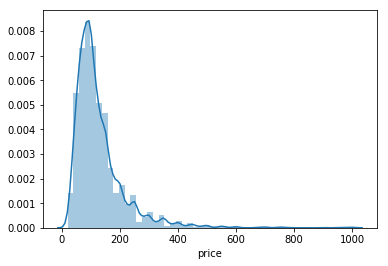

In [42]:
# Look at the price data distribution 

sns.distplot(listing_data['price'])

#### Section 4.2: Model Selection
I will try different learners to find the best model for forecasting the price from the data.  
I use three different machine learning modelz for predicting including RandomForestRegressor, AdaBoostRegressor, and Lasso regression. These learner do not require data to be scaled before training, so I will not do normalization. 

In [43]:
# create a function for evaluate a model with prediction time 

from sklearn.metrics import mean_squared_error, r2_score
from time import time

def train_predict(learner, X_train, y_train, X_test, y_test): 
    """
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: review_scores_rating training set
       - X_test: features testing set
       - y_test: review_scores_rating testing set
    """
    results = {}
    
    #Fit the learner to the training data a
    learner = learner.fit(X_train, y_train)
    
    
    # Get predictions on the test set(X_test), 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    #Compute score on the training samples
    results['mse_train'] = mean_squared_error(y_train, predictions_train)
    results['r2_train'] = r2_score(y_train, predictions_train)
    
    #Compute accuracy on test set
    results['mse_test'] = mean_squared_error(y_test,predictions_test)
    results['r2_test'] = r2_score(y_test,predictions_test)
    
    print("MSE_train: %.4f" % results['mse_train'])
    print("MSE_test: %.4f" % results['mse_test'])
    print("R2_train:%.4f" % learner.score(X_train,y_train))
    print("R2_test:%.4f" % learner.score(X_test,y_test))
    return results

In [44]:
#Initialize two different models

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso 

#clf1 = KNeighborsRegressor()
clf2 = RandomForestRegressor(random_state = 42)
clf3 = Lasso(random_state = 2 )
clf4 = AdaBoostRegressor(random_state =42)


# Collect results on the learners
results = {}
for clf in [ clf2, clf3, clf4]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf,  X_train, y_train, X_test, y_test)
    

MSE_train: 594.6598
MSE_test: 3986.5634
R2_train:0.9240
R2_test:0.5616
MSE_train: 3323.4422
MSE_test: 4310.1466
R2_train:0.5753
R2_test:0.5260
MSE_train: 5828.4941
MSE_test: 7507.0499
R2_train:0.2552
R2_test:0.1744


In [45]:
# Visualize the the result from four different models

def evaluate(results):
    """
    Visualization code to display results of various learners.
    inputs:
        results: a dictionary of individual learners, each learner is a dictionary of different metric  
    """
    # Create figure
    fig, ax = plt.subplots(2, 2, figsize = (12,7))
    fig.tight_layout()

    learners = results.keys()
    mdict = {'RandomForestRegressor': 'RF', 'KNeighborsRegressor':'KNN', 'Lasso': 'Lasso', 'AdaBoostRegressor': "Ada"}
    learners = [mdict[key] for key in learners]
     
    #  loop to plot four panels of data
    for j, metric in enumerate([ 'mse_train', 'r2_train', 'mse_test', 'r2_test']):
        y = []
        for  k, learner in enumerate(results.keys()):
            y.append( results[learner][metric])
            
        ax[j//2, j%2].bar(learners, y,   align='center', alpha=0.5)
        ax[j//2, j%2].set_title(metric)
        
    plt.show()
    

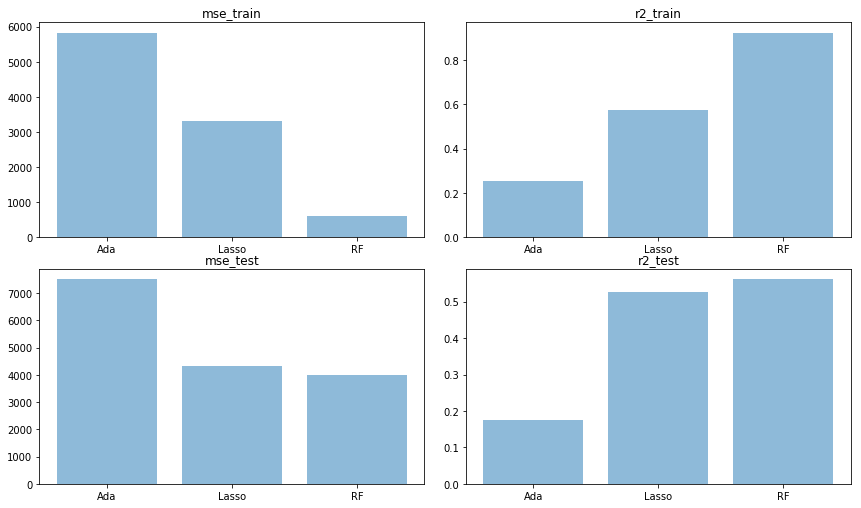

In [46]:
# show the results core graph 
evaluate(results)

In [47]:
print(results['AdaBoostRegressor'])
print(results['RandomForestRegressor'])
print(results['Lasso'])

{'mse_train': 5828.4941099735888, 'r2_train': 0.25523347447911193, 'mse_test': 7507.0499126517025, 'r2_test': 0.17442117977742466}
{'mse_train': 594.65984659448134, 'r2_train': 0.9240142068502557, 'mse_test': 3986.5634006282726, 'r2_test': 0.56158246617137064}
{'mse_train': 3323.442177607667, 'r2_train': 0.57532967578178573, 'mse_test': 4310.1465640452689, 'r2_test': 0.52599679544771205}


From the scores we get above, we can see the RandomForest Regressor perform better compared with other models in predicting listing price for airbnb data . In the next step, I will do hyperparameters tunning to obtain finer outcomes with RandomForestRegressor 


#### Section 4.3: Tunning model 
I use GridSearchCV to find the hyperparameter for best model for predicting

In [48]:
# Implementation: Model Tuning for Random Forest Regressor 
# we don't need to use scale data since Random Forest learner doesn't require the data to be normalized 
from sklearn.model_selection import GridSearchCV 
clf = RandomForestRegressor(random_state = 42 )

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.

parameters = {'max_depth': [None,5, 8, 10, 12,15, 20] ,'max_leaf_nodes' :[None, 2, 5, 10, 15],
              'min_samples_leaf': [1, 2,  5, 10] }

grid = GridSearchCV(clf, param_grid = parameters, cv = 5 )
grid.fit(X_train, y_train)
grid.best_estimator_
grid.best_params_
grid.best_score_ 

# The optimized and model
best_clf = grid.best_estimator_

# Make predictions using the optimized and model
best_predictions = best_clf.predict(X_test)

# Make predictions using the unoptimized and model
predictions = clf.fit(X_train, y_train).predict(X_test)



In [49]:
best_clf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [50]:
# Report the before-and-afterscores

print("Unoptimized model\n------")
print("MSE on testing data: {:.4f}".format(mean_squared_error(y_test, predictions)))
print("R2 on testing data: {:.4f}".format(r2_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final MSE on the testing data: {:.4f}".format(mean_squared_error(y_test, best_predictions)))
print("Final R2 on the testing data: {:.4f}".format(r2_score(y_test, best_predictions)))

Unoptimized model
------
MSE on testing data: 3986.5634
R2 on testing data: 0.5616

Optimized Model
------
Final MSE on the testing data: 3883.4704
Final R2 on the testing data: 0.5729


In [51]:
print(grid.best_params_)
print(best_clf)

{'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 10}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


###  Section 5:   Discussion and Conclusion   
From the result above I found the best model to predict price with optimized hyperparameter. 
This model has R2 score of 0.573 implies that the model can explain 57.3% variance in the data. 

## Part 2  What are the key features determine the price?
In the previous question, I aim to predict the listing price using a wide range of features. Now I will look at the 5 most important elements that determine the price of a listing 

### Section 1: Understand data 

### Section 2: Prepare Data 

The data used to answer this question is listings data. It has been preprocessed in the Part 1. So I don't need to prepare data for this question 

###  Section 3:  Modeling 


#### Section 3.1: 

Using the RandomForest Regressor to find the features importance 
The RandomForest Regressor learner has the feature_importance attribute. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In [52]:
# TODO: Import a supervised learning model that has 'feature_importances_'
#Random Forest Classifier model has the feature_importances attribute 

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
importances

array([  8.55427135e-03,   2.09078911e-03,   1.61051242e-03,
         2.41305868e-03,   2.71228022e-02,   9.06456729e-02,
         4.04408322e-01,   6.44654381e-03,   1.82285577e-02,
         5.03824486e-02,   1.27837089e-02,   2.06780531e-02,
         1.07479310e-02,   8.45648350e-03,   1.00912331e-02,
         8.65910690e-03,   1.19359404e-02,   2.11627693e-02,
         1.53985088e-02,   1.22182820e-02,   3.97705871e-03,
         4.69758550e-03,   2.74402697e-03,   1.77297925e-03,
         3.11390995e-03,   3.08112019e-03,   1.33849016e-03,
         8.81695695e-04,   1.00673741e-03,   4.75557194e-03,
         4.63133517e-02,   3.97344842e-03,   3.73984336e-03,
         1.71915251e-04,   3.86635896e-04,   6.36694801e-03,
         8.79689079e-03,   2.32127771e-03,   8.87263222e-04,
         1.12882223e-02,   4.94034591e-04,   4.04227960e-04,
         2.03107574e-03,   3.09059558e-04,   1.70616724e-03,
         1.11541081e-02,   6.04772333e-04,   7.36116950e-04,
         1.21554294e-04,

#### Section 3.2:  Plot the top five important features 

In [53]:
# Create a function for feature plot 
def feature_plot(importances, X_train, y_train):
    
    # Display the most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  


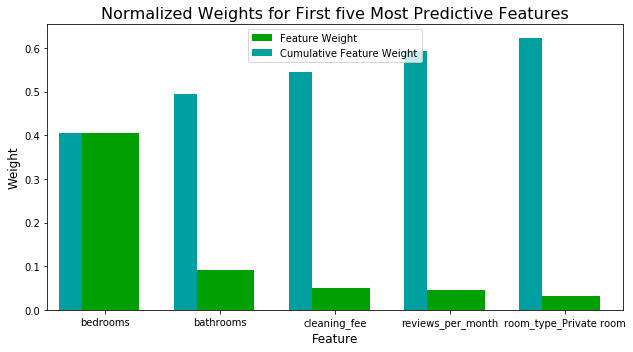

In [54]:
# plot the top five feature importance with feature weight 

feature_plot(importances, X_train, y_train)

###  Section 4  : Conclusion
From the analysis above, we can see that, the most 5 important features in predicting rental price is :
* number of bedrooms
* number of bathrooms 
* cleaning fee 
* average number of review per month 
* Private Room or not 

## Part 3: How the listing availablity and price vary across months ?

### Section 1: Data Understanding 

#### Section 1.1: Import data and explore 

In [55]:
from datetime import datetime

In [56]:
# import data 

calendar = pd.read_csv("./airbnbdata/calendar.csv")

In [57]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [58]:
calendar.shape

(1393570, 4)

### Section 2: Data preparation 


#### Section 2.1: Assess mising value 

In [59]:
# summary of missing value across column

calendar.isnull().sum(axis = 0 )

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [60]:
print(calendar['available'].value_counts())
calendar[calendar['available'] == 'f'].shape

t    934542
f    459028
Name: available, dtype: int64


(459028, 4)

We can see that the price is missing when the house/apartment is not available. 
For my analysis, I will drop keep only samples have the 't' value for column 'available,' which means the listing is available. 

In [61]:
calendar_data = calendar[calendar['available'] == 't']

#### Section 2.1: Encode the data 
the column 'price' currently has string type with dollar, need to be converted to numeric without specicial character

In [62]:
def clean(x):
    if str(x) != "":
        x = float(str(x).replace('$', "").replace(",", ""))
        
    return x 

calendar_data['price'] = calendar['price'].apply(lambda x: clean(x))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#### Section 2.2: Feature Engineering  

The orginal data contain the date column with string type. I will convert to date time format. I also create the new column of year and month to do the analysis

In [63]:
calendar_data['date'] = calendar_data['date'].apply(lambda x: pd.to_datetime(x))
calendar_data['month'] = calendar_data['date'].apply(lambda x: x.month)
calendar_data['year'] =  calendar_data['date'].apply(lambda x: x.year)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [64]:
calendar_data.shape 

(934542, 6)

In [65]:
print(" the first date in the calendar data is {}".format(calendar['date'].min()))
print(" the last date in the calendar data is {}".format(calendar['date'].max()))

 the first date in the calendar data is 2016-01-04
 the last date in the calendar data is 2017-01-02


We can see that the data are spreading from 2016/01/04 to 2017/01/02. We have 13 individual months in total in our data. However, we only had two days in Jan 2017, and we had nearly a month in January 2016. I combine Jan 2017 and Jan 2016 to get the aggregate number for January. 

### Section 3 : Data modeling 

#### Section 3.1: Summary outcome variables of interest by month 

In [66]:
#get the total availability, group by month 
avail_summary = calendar_data.groupby('month')['available'].aggregate('size').reset_index()

In [67]:
avail_summary

,month,available
0,1,64937
1,2,73321
2,3,83938
3,4,76037
4,5,79971
5,6,77244
6,7,74222
7,8,76347
8,9,77246
9,10,82438


In [68]:
# get the averange price,  group by month 

price_summary = calendar_data.groupby('month')['price'].aggregate('mean').reset_index()

#### Section 3.2: Visualization 

Text(0.5,1,'number of rental availability by month')

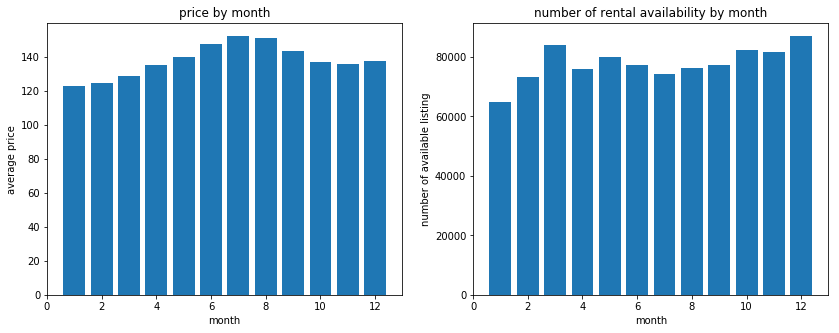

In [69]:
# plot the graph showing the price across months
plt.figure(1, figsize = (14, 5))
plt.subplot(121)

plt.bar(price_summary['month'], price_summary['price'])
plt.xlabel('month')
plt.ylabel('average price')
plt.title('price by month')


# plot the graph showing the availability across months
plt.subplot(122)
plt.bar(avail_summary['month'], avail_summary['available'])
plt.xlabel('month')
plt.ylabel('number of available listing')
plt.title('number of rental availability by month')

### Section 4 : Conclusion 
 From the graph above, we can see that the availability of property listing on Airbnb is lowest during the month of June, July, and August. In addition, the average price is highest during these months. It is possibly due to the high demand of room during the traveling season in Seattle.